In [6]:
''' IMPORT ALL THE THINGS '''
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
import pandas as pd

In [7]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
''' DEFINE PATH TO THE DATASETS '''

'''CWD = os.getcwd().replace('\\','/') # get current workspace directory
IMAGE_DIR = f'{CWD}/images'
TRAIN_DATASET_DIR = f'{IMAGE_DIR}/train'
TEST_DATASET_DIR = f'{IMAGE_DIR}/test'
VAL_DATASET_DIR = f'{IMAGE_DIR}/validation'

CATEGORIES = ['clementine','grapefruit','orange']'''

# print('CWD :',CWD)
# print('IMAGE_DIR :',IMAGE_DIR)
# print('TRAIN_DATASET_DIR :',TRAIN_DATASET_DIR)
# print('TEST_DATASET_DIR :',TEST_DATASET_DIR)
# print('VAL_DATASET_DIR :',VAL_DATASET_DIR)
# print('CATEGORIES :', CATEGORIES)

"CWD = os.getcwd().replace('\\','/') # get current workspace directory\nIMAGE_DIR = f'{CWD}/images'\nTRAIN_DATASET_DIR = f'{IMAGE_DIR}/train'\nTEST_DATASET_DIR = f'{IMAGE_DIR}/test'\nVAL_DATASET_DIR = f'{IMAGE_DIR}/validation'\n\nCATEGORIES = ['clementine','grapefruit','orange']"

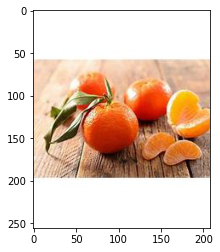

In [9]:
img = image.load_img("/basedata/train/clementine/1.jpg")
plt.imshow(img)

**กำหนด path ใหม่ เพราะ run จาก machine บน google colab**

In [10]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [11]:
train_dataset = train.flow_from_directory("/basedata/train",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

validation_dataset = validation.flow_from_directory("/basedata/validation",
                                          target_size=(224,224),
                                          batch_size = 3,
                                          class_mode ="categorical")

Found 1990 images belonging to 3 classes.
Found 567 images belonging to 3 classes.


In [12]:
train_dataset.class_indices

{'clementine': 0, 'grapefruit': 1, 'orange': 2}

In [13]:
validation_dataset.class_indices

{'clementine': 0, 'grapefruit': 1, 'orange': 2}

In [14]:
''' Create Augmented Data '''

' Create Augmented Data '

In [15]:
''' Get pre train model '''
VGG = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
VGG.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [16]:
''' Create a model '''
model = tf.keras.models.Sequential([
                                    VGG,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.summary() # show all the model's layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 21,204,035
Trainable params: 6,489,347
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
''' Compiling '''

opt = tf.keras.optimizers.Adam(learning_rate=0.001) ### can be changed
los = tf.keras.losses.categorical_crossentropy  ### can be changed
  

model.compile(optimizer=opt, loss=los, metrics=['accuracy'])


In [22]:
''' Training '''
model.fit(
    train_dataset, # both data and label cause we use ImageDataGenerator
    
    epochs=56, ### can be change 
    validation_data= validation_dataset,
    
    shuffle=True 
)


Epoch 1/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1453 - accuracy: 0.9437 - val_loss: 1.2045 - val_accuracy: 0.7178
Epoch 2/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1319 - accuracy: 0.9523 - val_loss: 1.5464 - val_accuracy: 0.6790
Epoch 3/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1346 - accuracy: 0.9467 - val_loss: 1.2732 - val_accuracy: 0.7055
Epoch 4/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1355 - accuracy: 0.9497 - val_loss: 1.7352 - val_accuracy: 0.6138
Epoch 5/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1006 - accuracy: 0.9618 - val_loss: 1.8069 - val_accuracy: 0.6772
Epoch 6/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1304 - accuracy: 0.9467 - val_loss: 1.1170 - val_accuracy: 0.6896
Epoch 7/56
664/664 [==============================] - 10s 15ms/step - loss: 0.1063 - accuracy: 0.9588 - val_loss: 1.6483 - val_accuracy:

In [24]:
''' Evaluating '''
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


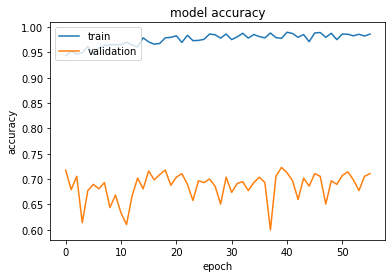

In [33]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

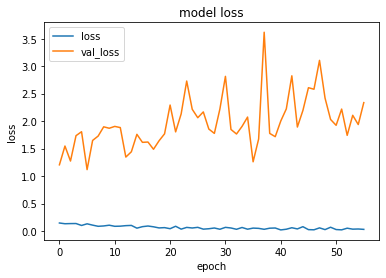

In [34]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [21]:
''' Predicting '''

' Predicting '